In [69]:
! pip install fpdf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 1.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import datetime

In [22]:
df = pd.read_csv('fashion_data_2018_2022.csv')
df.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,20%,1/28/2018,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0%,1/28/2018,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,5%,1/7/2018,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,10%,1/1/2018,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0%,1/28/2018,126,1,2018


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          660 non-null    int64  
 1   product_name        660 non-null    object 
 2   gender              660 non-null    object 
 3   category            660 non-null    object 
 4   pattern             660 non-null    object 
 5   color               660 non-null    object 
 6   age_group           660 non-null    object 
 7   season              660 non-null    object 
 8   price               660 non-null    float64
 9   material            660 non-null    object 
 10  sales_count         660 non-null    int64  
 11  reviews_count       660 non-null    int64  
 12  average_rating      660 non-null    float64
 13  out_of_stock_times  660 non-null    int64  
 14  brand               660 non-null    object 
 15  discount            660 non-null    object 
 16  last_sto

In [24]:
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

In [25]:
df.describe()

,product_id,price,sales_count,reviews_count,average_rating,out_of_stock_times,wish_list_count,month_of_sale,year_of_sale
count,660.000000,660.000000,660.00000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1330.500000,84.967939,265.55303,62.156061,4.016212,3.534848,151.683333,6.500000,2020.000000
std,190.669872,37.622893,132.32956,23.564812,0.550895,1.705209,57.430499,3.454671,1.415286
min,1001.000000,20.250000,50.00000,20.000000,3.000000,1.000000,50.000000,1.000000,2018.000000
25%,1165.750000,53.197500,149.00000,42.000000,3.600000,2.000000,99.000000,3.750000,2019.000000
50%,1330.500000,82.040000,257.00000,63.000000,4.000000,4.000000,151.000000,6.500000,2020.000000
75%,1495.250000,117.770000,378.50000,83.250000,4.500000,5.000000,203.000000,9.250000,2021.000000
max,1660.000000,149.930000,500.00000,100.000000,5.000000,6.000000,250.000000,12.000000,2022.000000


<Axes: xlabel='count', ylabel='product_name'>

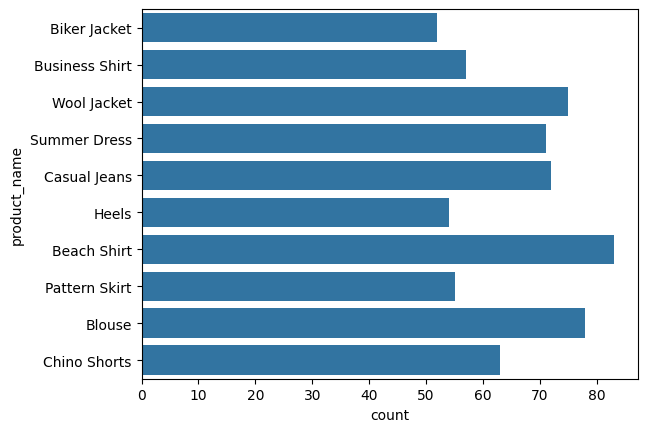

In [26]:
import seaborn as sns
sns.countplot(y='product_name',data=df)

<Axes: xlabel='count', ylabel='category'>

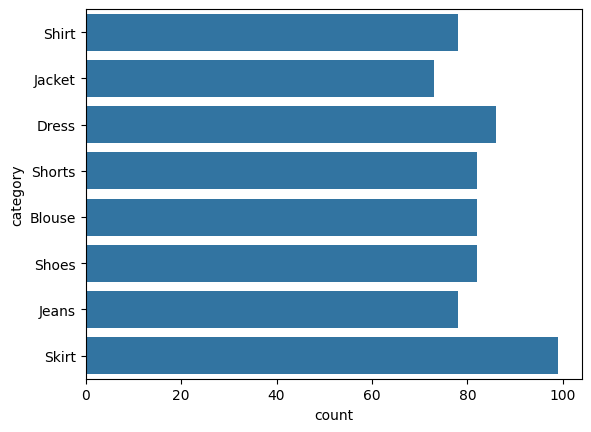

In [27]:
sns.countplot(y='category',data=df)

In [28]:
x = 'season'
y = 'category'
out = df[[x, y]].groupby([x]).value_counts().unstack(fill_value=0)

In [29]:
out

category,Blouse,Dress,Jacket,Jeans,Shirt,Shoes,Shorts,Skirt
season,,,,,,,,
All,22,22,16,14,18,19,14,24
Autumn,16,11,11,17,17,15,16,25
Spring,20,20,13,17,17,18,17,13
Summer,5,12,18,12,12,16,18,21
Winter,19,21,15,18,14,14,17,16


In [42]:
def func(df, x, y):
  out = df[[x, y]].groupby([x]).value_counts().unstack(fill_value=0)
  temp_dict = out.to_dict('index')
  return temp_dict

topCategoryForSeasons = func(df, 'season', 'category')
topCategoryForSeasons

{'All': {'Blouse': 22,
  'Dress': 22,
  'Jacket': 16,
  'Jeans': 14,
  'Shirt': 18,
  'Shoes': 19,
  'Shorts': 14,
  'Skirt': 24},
 'Autumn': {'Blouse': 16,
  'Dress': 11,
  'Jacket': 11,
  'Jeans': 17,
  'Shirt': 17,
  'Shoes': 15,
  'Shorts': 16,
  'Skirt': 25},
 'Spring': {'Blouse': 20,
  'Dress': 20,
  'Jacket': 13,
  'Jeans': 17,
  'Shirt': 17,
  'Shoes': 18,
  'Shorts': 17,
  'Skirt': 13},
 'Summer': {'Blouse': 5,
  'Dress': 12,
  'Jacket': 18,
  'Jeans': 12,
  'Shirt': 12,
  'Shoes': 16,
  'Shorts': 18,
  'Skirt': 21},
 'Winter': {'Blouse': 19,
  'Dress': 21,
  'Jacket': 15,
  'Jeans': 18,
  'Shirt': 14,
  'Shoes': 14,
  'Shorts': 17,
  'Skirt': 16}}

In [51]:
topProductForSeasons = func(df, 'season', 'product_name')
# topProductForSeasons

In [52]:
topProductForAgeGroups = func(df, 'age_group', 'product_name')
# topProductForAgeGroups

In [56]:
topPatternForCategory = func(df, 'category', 'pattern')
# topProductForCategory

In [58]:
topCategoryForGender = func(df, 'gender', 'category')

In [59]:
topCategoryForGender

{'Female': {'Blouse': 42,
  'Dress': 48,
  'Jacket': 44,
  'Jeans': 45,
  'Shirt': 35,
  'Shoes': 36,
  'Shorts': 34,
  'Skirt': 47},
 'Male': {'Blouse': 40,
  'Dress': 38,
  'Jacket': 29,
  'Jeans': 33,
  'Shirt': 43,
  'Shoes': 46,
  'Shorts': 48,
  'Skirt': 52}}

In [63]:
categorySeason_text = ''
print("Top Category of each season:")
for season in topCategoryForSeasons.keys():
  for category in topCategoryForSeasons[season].keys():
    categorySeason_text += f'One of the top dress item for {season} season is {category}. It is {topCategoryForSeasons[season][category]} times likely to be worn.\n'
    # print(categorySeason_text)


print('-'*100)

productSeason_text = ''
print("Top Product of each season:")
for season in topProductForSeasons.keys():
  for product in topProductForSeasons[season].keys():
    productSeason_text += f'One of the top product item for {season} season is {product}. It is {topProductForSeasons[season][product]} times likely to be purchased.\n'
    # print(productSeason_text)

print('-'*100)

productAgeGroup_text = ''
print("Top Product of each age group:")
for ageGroup in topProductForAgeGroups.keys():
  for product in topProductForAgeGroups[ageGroup].keys():
    productAgeGroup_text += f'One of the top product item for {ageGroup} age group is {product}. It is {topProductForAgeGroups[ageGroup][product]} times likely to be purchased by this age group.\n'
    # print(productAgeGroup_text)

print('-'*100)

patternCategory_text = ''
print("Top Pattern of each Category:")
for category in topPatternForCategory.keys():
  for pattern in topPatternForCategory[category].keys():
    patternCategory_text += f'One of the top pattern for {category} is {pattern}. It is {topPatternForCategory[category][pattern]} times likely to be worn.\n'
    # print(patternCategory_text)

print('-'*100)

categoryGender_text = ''
print("Top Category of each gender:")
for gender in topCategoryForGender.keys():
  for category in topCategoryForGender[gender].keys():
    categoryGender_text += f'One of the dress item for {gender} is {category}. It is {topCategoryForGender[gender][category]} times likely to be purchased by {gender}s.\n'
    # print(categoryGender_text)

Top Category of each season:
----------------------------------------------------------------------------------------------------
Top Product of each season:
----------------------------------------------------------------------------------------------------
Top Product of each age group:
----------------------------------------------------------------------------------------------------
Top Pattern of each Category:
----------------------------------------------------------------------------------------------------
Top Category of each gender:


In [64]:
print(categoryGender_text)

One of the dress item for Female is Blouse. It is 42 times likely to be purchased by Females.
One of the dress item for Female is Dress. It is 48 times likely to be purchased by Females.
One of the dress item for Female is Jacket. It is 44 times likely to be purchased by Females.
One of the dress item for Female is Jeans. It is 45 times likely to be purchased by Females.
One of the dress item for Female is Shirt. It is 35 times likely to be purchased by Females.
One of the dress item for Female is Shoes. It is 36 times likely to be purchased by Females.
One of the dress item for Female is Shorts. It is 34 times likely to be purchased by Females.
One of the dress item for Female is Skirt. It is 47 times likely to be purchased by Females.
One of the dress item for Male is Blouse. It is 40 times likely to be purchased by Males.
One of the dress item for Male is Dress. It is 38 times likely to be purchased by Males.
One of the dress item for Male is Jacket. It is 29 times likely to be purc

In [65]:
print(patternCategory_text)

One of the top pattern for Blouse is Floral. It is 2 times likely to be worn.
One of the top pattern for Blouse is Geometric. It is 22 times likely to be worn.
One of the top pattern for Blouse is Heart. It is 2 times likely to be worn.
One of the top pattern for Blouse is Plain. It is 34 times likely to be worn.
One of the top pattern for Blouse is Polka Dots. It is 16 times likely to be worn.
One of the top pattern for Blouse is Striped. It is 6 times likely to be worn.
One of the top pattern for Dress is Floral. It is 4 times likely to be worn.
One of the top pattern for Dress is Geometric. It is 22 times likely to be worn.
One of the top pattern for Dress is Heart. It is 4 times likely to be worn.
One of the top pattern for Dress is Plain. It is 23 times likely to be worn.
One of the top pattern for Dress is Polka Dots. It is 30 times likely to be worn.
One of the top pattern for Dress is Striped. It is 3 times likely to be worn.
One of the top pattern for Jacket is Floral. It is 0

In [66]:
print(productAgeGroup_text)

One of the top product item for 18-24 age group is Beach Shirt. It is 24 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Biker Jacket. It is 24 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Blouse. It is 21 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Business Shirt. It is 23 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Casual Jeans. It is 24 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Chino Shorts. It is 18 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Heels. It is 22 times likely to be purchased by this age group.
One of the top product item for 18-24 age group is Pattern Skirt. It is 24 times likely to be purchased by this age group.
One of the top product item for 18-

In [67]:
print(productSeason_text)

One of the top product item for All season is Beach Shirt. It is 22 times likely to be purchased.
One of the top product item for All season is Biker Jacket. It is 8 times likely to be purchased.
One of the top product item for All season is Blouse. It is 18 times likely to be purchased.
One of the top product item for All season is Business Shirt. It is 13 times likely to be purchased.
One of the top product item for All season is Casual Jeans. It is 18 times likely to be purchased.
One of the top product item for All season is Chino Shorts. It is 20 times likely to be purchased.
One of the top product item for All season is Heels. It is 9 times likely to be purchased.
One of the top product item for All season is Pattern Skirt. It is 10 times likely to be purchased.
One of the top product item for All season is Summer Dress. It is 13 times likely to be purchased.
One of the top product item for All season is Wool Jacket. It is 18 times likely to be purchased.
One of the top product i

In [68]:
print(categorySeason_text)

One of the top dress item for All season is Blouse. It is 22 times likely to be worn.
One of the top dress item for All season is Dress. It is 22 times likely to be worn.
One of the top dress item for All season is Jacket. It is 16 times likely to be worn.
One of the top dress item for All season is Jeans. It is 14 times likely to be worn.
One of the top dress item for All season is Shirt. It is 18 times likely to be worn.
One of the top dress item for All season is Shoes. It is 19 times likely to be worn.
One of the top dress item for All season is Shorts. It is 14 times likely to be worn.
One of the top dress item for All season is Skirt. It is 24 times likely to be worn.
One of the top dress item for Autumn season is Blouse. It is 16 times likely to be worn.
One of the top dress item for Autumn season is Dress. It is 11 times likely to be worn.
One of the top dress item for Autumn season is Jacket. It is 11 times likely to be worn.
One of the top dress item for Autumn season is Jean

In [70]:
from fpdf import FPDF

full_text = 'Top Category of each season:\n' + categorySeason_text + '\n\nTop Product of each season:\n' + productSeason_text + '\n\nTop Product of each age group:\n' + productAgeGroup_text + '\n\nTop Pattern of each Category:\n' + patternCategory_text + '\n\nTop Category of each gender:\n' + categoryGender_text

# Function to generate PDF
def generate_pdf(filename, text_content):
    pdf = FPDF()
    pdf.add_page()

    # Title
    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Most Selling Products, Patterns and Categories", ln=True, align="C")

    # Add some space
    pdf.ln(10)

    # Set the font for the text content
    pdf.set_font("Arial", size=12)

    # Add the text content
    pdf.multi_cell(0, 10, text_content)

    # Save the PDF
    pdf.output(filename)

# Generate the PDF with the combined text content
generate_pdf("Fashin_Analysis_report.pdf", full_text)


<ipython-input-70-bdff0dbb5146>:11: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 16)
<ipython-input-70-bdff0dbb5146>:12: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, "Most Selling Products, Patterns and Categories", ln=True, align="C")
<ipython-input-70-bdff0dbb5146>:18: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)


In [14]:
# Convert 'last_stock_date' to datetime
df['last_stock_date'] = pd.to_datetime(df['last_stock_date'])

# Encode categorical variables
label_encoders = {}
for column in ['product_name', 'gender', 'category', 'pattern', 'color', 'age_group', 'season', 'material', 'brand']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Remove '%' from discount and convert to float
df['discount'] = df['discount'].str.rstrip('%').astype('float')

# Normalize numerical variables
scalers = {}
for column in ['price', 'sales_count', 'reviews_count', 'average_rating', 'out_of_stock_times', 'discount', 'wish_list_count']:
    scalers[column] = MinMaxScaler()
    df[column] = scalers[column].fit_transform(df[column].values.reshape(-1, 1))


# Drop unnecessary columns for prediction
df.drop(columns=['product_id', 'last_stock_date', 'month_of_sale', 'year_of_sale'], inplace=True)

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 12  # Sequence length (e.g., 12 months)
sequences, targets = create_sequences(df.values, seq_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)


Epoch 1/100
13/13 [==============================] - 6s 94ms/step - loss: 6.7492 - val_loss: 5.2419
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 4.3342 - val_loss: 3.3138
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 2.9632 - val_loss: 2.6495
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 2.5848 - val_loss: 2.5682
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 2.5413 - val_loss: 2.5606
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 2.5317 - val_loss: 2.5650
Epoch 7/100
13/13 [==============================] - 0s 21ms/step - loss: 2.5355 - val_loss: 2.5592
Epoch 8/100
13/13 [==============================] - 0s 17ms/step - loss: 2.5298 - val_loss: 2.5549
Epoch 9/100
13/13 [==============================] - 0s 17ms/step - loss: 2.5292 - val_loss: 2.5477
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - loss: 2.5281 - val_loss: 2.5456

In [15]:
predictions

array([[ 4.2889977e+00,  5.3132939e-01,  3.6583328e+00, ...,
         6.8159271e-03,  4.7636539e-01,  4.5487192e-01],
       [ 4.1981721e+00,  5.0884569e-01,  3.5492890e+00, ...,
        -3.2585926e-02,  5.4687893e-01,  3.7600559e-01],
       [ 4.1065474e+00,  5.0055438e-01,  3.5033145e+00, ...,
         1.7087599e-02,  5.1832587e-01,  4.1404092e-01],
       ...,
       [ 4.7449241e+00,  5.6427819e-01,  3.1801264e+00, ...,
         2.7787201e-03,  5.2280563e-01,  5.1723528e-01],
       [ 4.6388788e+00,  5.6498742e-01,  3.1841149e+00, ...,
        -8.4856637e-03,  5.4813462e-01,  4.5835295e-01],
       [ 4.2317181e+00,  5.2280056e-01,  3.5674579e+00, ...,
         7.0919357e-03,  5.2868944e-01,  3.7939876e-01]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            13400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
Total params: 34416 (134.44 KB)
Trainable params: 34416 (134.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
